In [67]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,11

In [68]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('mongodb://localhost:27017/')
#print(myclient.list_database_names())
mydb = client['network']
mycol= mydb['cost']
l=[]
for i in mycol.find():
    del i['_id']
    l.append(dict(i))
# print(l)

In [69]:
from datetime import datetime
l = sorted(l, key=lambda x: datetime.strptime(x['Date'], '%d-%m-%Y'),reverse=True)
# print(l)

In [70]:
dataset=pd.DataFrame(l)
dataset['Date']=pd.to_datetime(dataset['Date'],infer_datetime_format=True)
# dataset = dataset.sort_values(by='Date',ascending=True,inplace=True)
indexdataset=dataset.set_index(['Date'])
# print(indexdataset)
indexdataset.dropna(inplace=True)

In [71]:
indexdataset.head(15)

,Traffic
Date,
2018-12-30,765
2018-12-29,735
2018-12-27,678
2018-12-25,654
2018-12-22,567
2018-12-22,567
2018-12-19,543
2018-12-12,456
2018-12-09,456


In [72]:
#indexdataset.info()

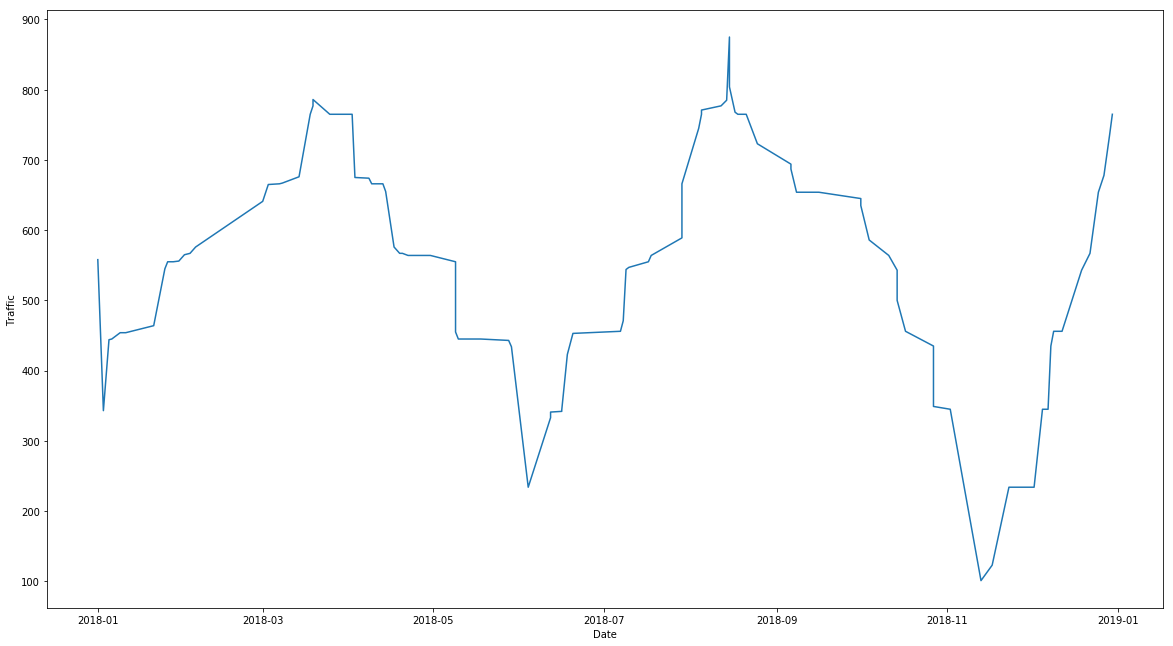

In [73]:
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.plot(indexdataset)

In [74]:
#rolling statistics
rolmean=indexdataset.rolling(window=12).mean()
rolstd=indexdataset.rolling(window=12).std()
rolmean.dropna(inplace=True)
rolstd.dropna(inplace=True)
print(rolmean,rolstd)

               Traffic
Date                  
2018-12-05  545.500000
2018-12-02  501.250000
2018-11-29  459.500000
2018-11-28  422.500000
2018-11-23  387.500000
2018-11-17  350.500000
2018-11-17  313.500000
2018-11-13  276.666667
2018-11-02  267.416667
2018-10-27  258.500000
2018-10-27  258.500000
2018-10-17  267.750000
2018-10-14  280.666667
2018-10-14  306.416667
2018-10-11  333.916667
2018-10-04  363.250000
2018-10-01  396.666667
2018-10-01  440.166667
2018-09-16  484.416667
2018-09-08  530.500000
2018-09-06  559.000000
2018-09-06  587.750000
2018-08-25  611.750000
2018-08-21  637.500000
2018-08-18  659.583333
2018-08-17  678.333333
2018-08-15  698.333333
2018-08-15  722.416667
2018-08-14  734.916667
2018-08-12  745.916667
...                ...
2018-04-17  525.750000
2018-04-14  543.416667
2018-04-13  561.833333
2018-04-09  580.250000
2018-04-08  598.500000
2018-04-03  608.500000
2018-04-02  625.250000
2018-03-25  642.000000
2018-03-19  660.500000
2018-03-19  678.250000
2018-03-18 

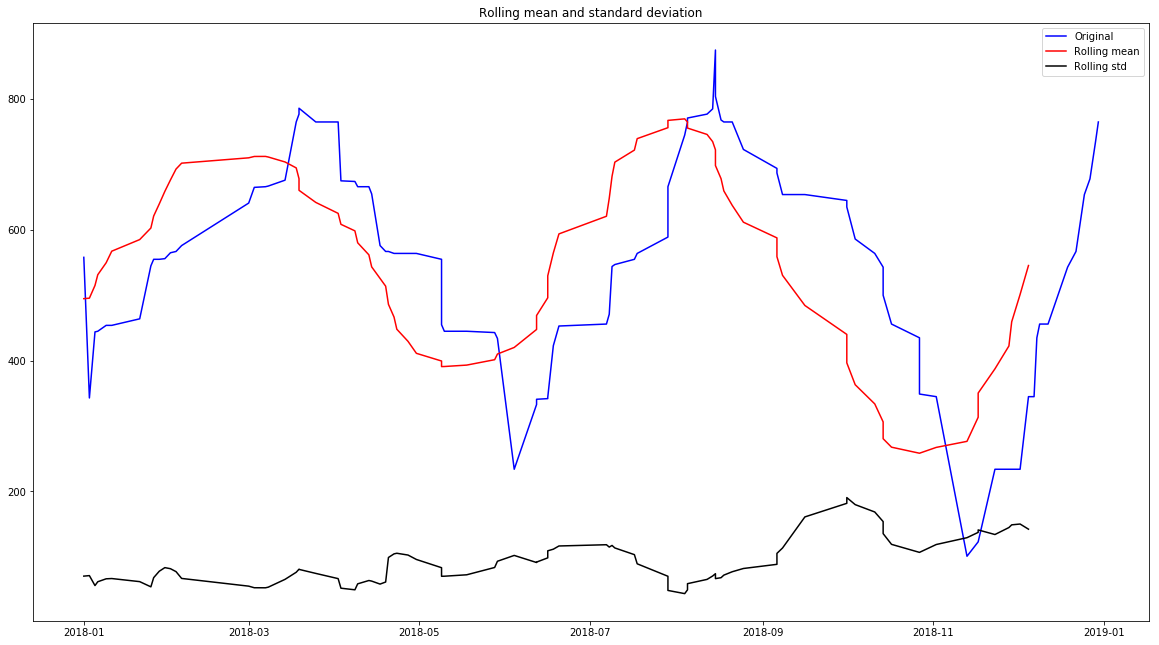

In [75]:
org=plt.plot(indexdataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

In [76]:
#dicky fuller test
from statsmodels.tsa.stattools import adfuller
print('results of dickey fuller test: ')
dftest=adfuller(indexdataset['Traffic'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistics','p-value','lags used','no. of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical values (%s)'%key]=value

print(dfoutput)

results of dickey fuller test: 
Test statistics             -3.314685
p-value                      0.014235
lags used                    5.000000
no. of observations used    95.000000
Critical values (1%)        -3.501137
Critical values (5%)        -2.892480
Critical values (10%)       -2.583275
dtype: float64


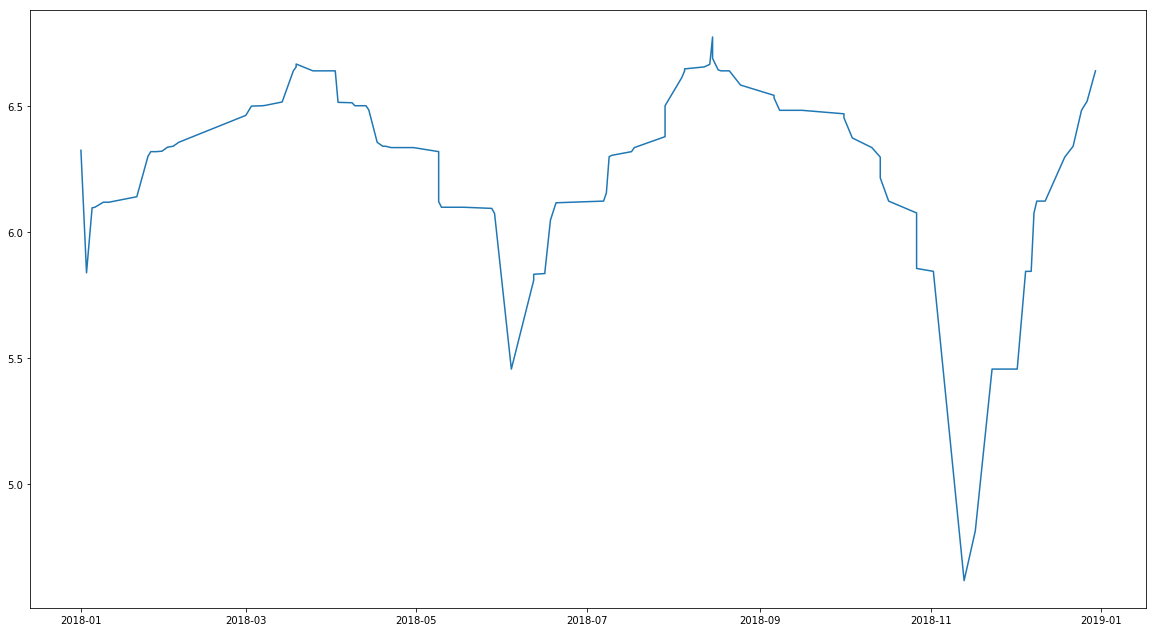

In [77]:
indexdataset_logscale=np.log(indexdataset)
# print(indexdataset_logscale)
indexdataset_logscale.dropna(inplace=True)
plt.plot(indexdataset_logscale)

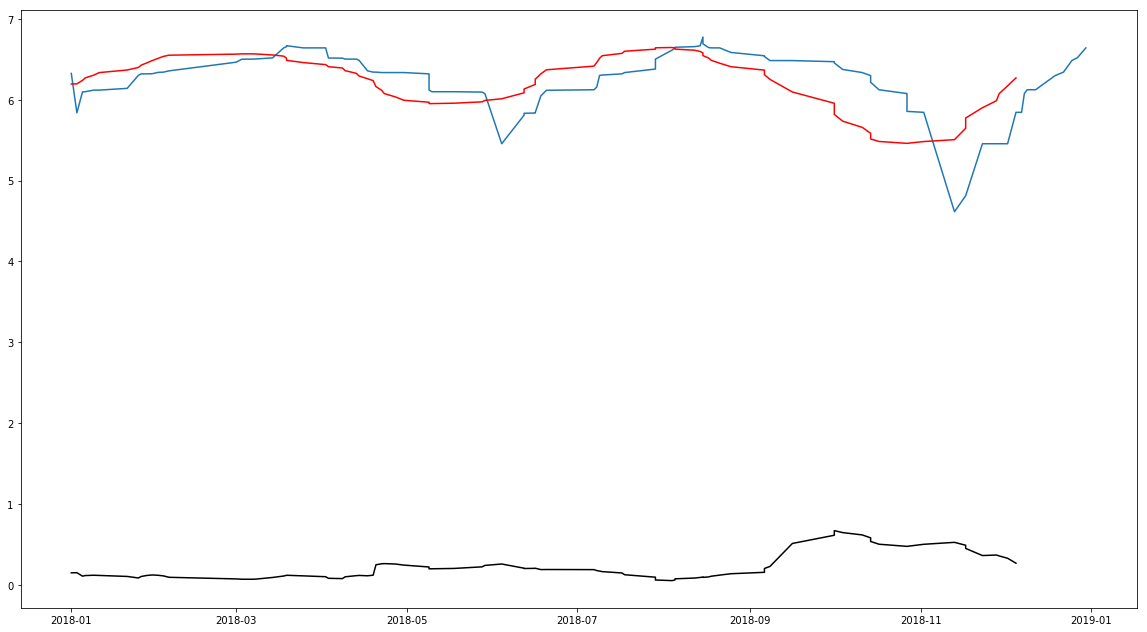

In [78]:
movingaverage=indexdataset_logscale.rolling(window=12).mean()
movingstd=indexdataset_logscale.rolling(window=12).std()
plt.plot(indexdataset_logscale)
plt.plot(movingaverage,color='red')
plt.plot(movingstd,color='black')

In [79]:
minusmovingaverage=indexdataset_logscale-movingaverage
minusmovingaverage.head(12)
minusmovingaverage.dropna(inplace=True)
minusmovingaverage.head(12)

,Traffic
Date,
2018-12-05,-0.425393
2018-12-02,-0.714903
2018-11-29,-0.619524
2018-11-28,-0.530872
2018-11-23,-0.445223
2018-11-17,-0.961012
2018-11-17,-0.833664
2018-11-13,-0.890562
2018-11-02,0.361107


In [80]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #determine rolling statistics
    movingaverage=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    #perform rolling statistics
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingaverage,color='red',label='rolling mean')
    std=plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & standard deviation')
    plt.show(block=False)
    #perform dicky fuller test 
    print('results of dickey fuller test: ')
    dftest=adfuller(timeseries['Traffic'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test statistics','p-value','lags used','no. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical values (%s)'%key]=value
    print(dfoutput)
    


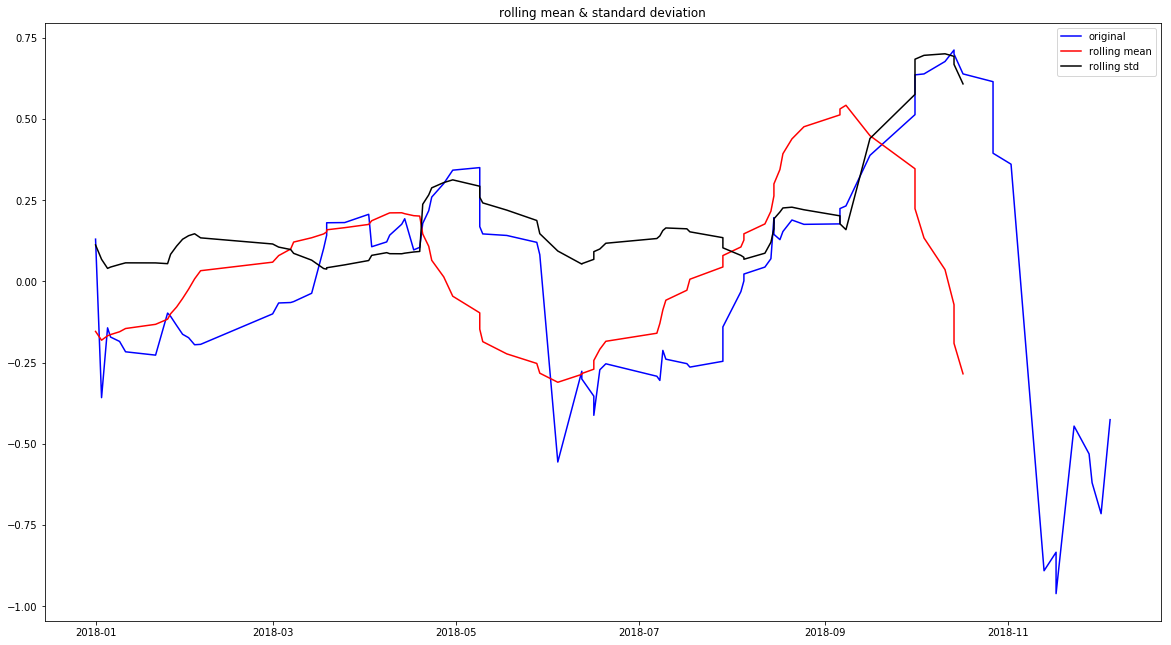

results of dickey fuller test: 
Test statistics             -4.505410
p-value                      0.000192
lags used                    5.000000
no. of observations used    84.000000
Critical values (1%)        -3.510712
Critical values (5%)        -2.896616
Critical values (10%)       -2.585482
dtype: float64


In [81]:
test_stationary(minusmovingaverage)

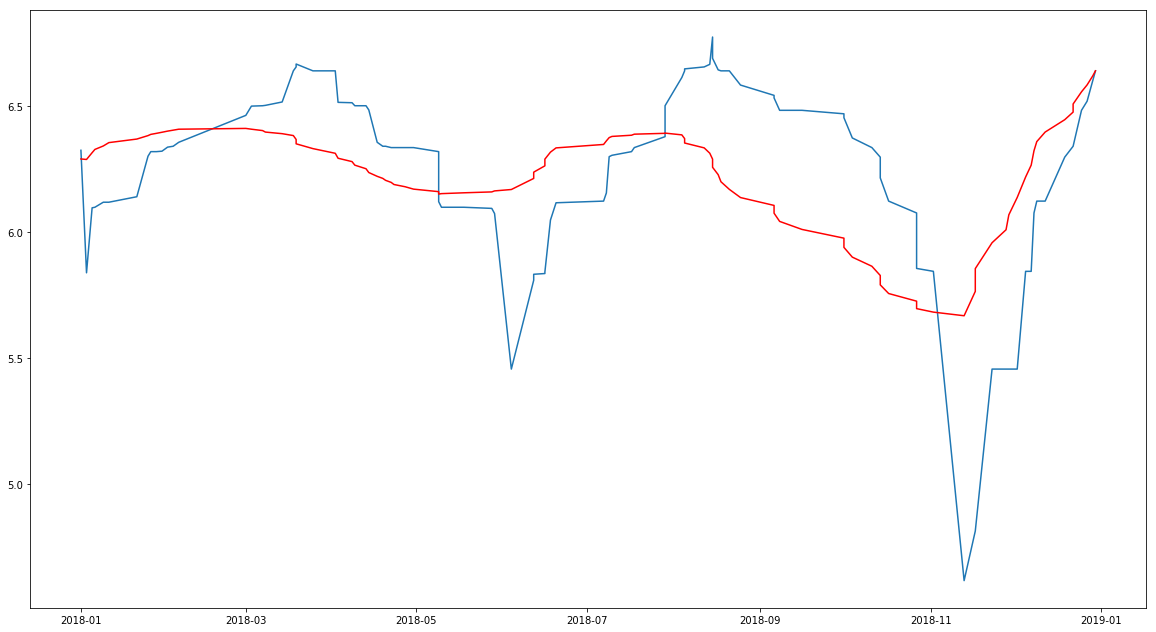

In [82]:
expodecayaverage=indexdataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexdataset_logscale)
plt.plot(expodecayaverage,color='red')

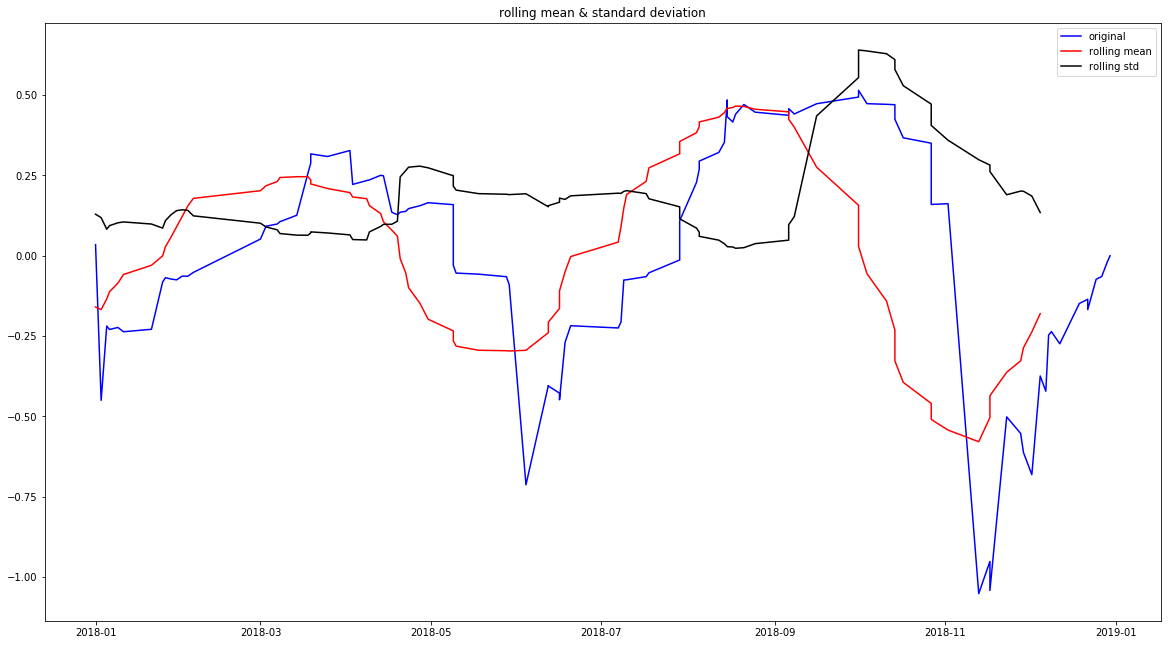

results of dickey fuller test: 
Test statistics             -2.757386
p-value                      0.064623
lags used                    5.000000
no. of observations used    95.000000
Critical values (1%)        -3.501137
Critical values (5%)        -2.892480
Critical values (10%)       -2.583275
dtype: float64


In [83]:
minusmovingexpodecayaverage=indexdataset_logscale-expodecayaverage
test_stationary(minusmovingexpodecayaverage)

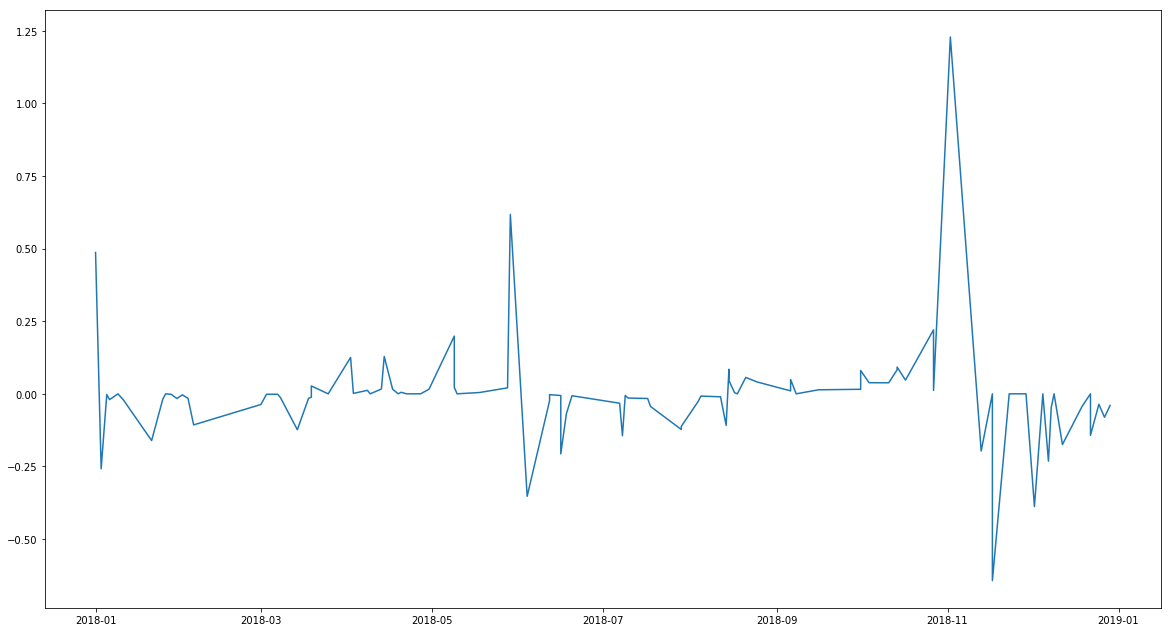

In [84]:
datasetlogshifting=indexdataset_logscale-indexdataset_logscale.shift()
plt.plot(datasetlogshifting)

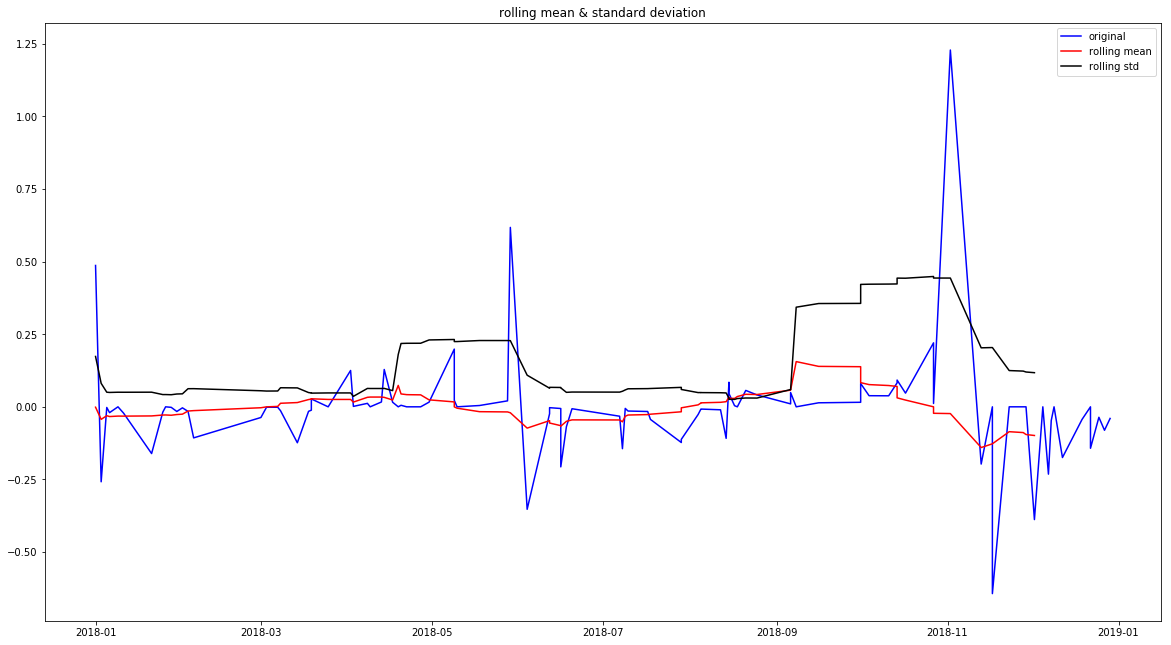

results of dickey fuller test: 
Test statistics            -6.025095e+00
p-value                     1.462358e-07
lags used                   2.000000e+00
no. of observations used    9.700000e+01
Critical values (1%)       -3.499637e+00
Critical values (5%)       -2.891831e+00
Critical values (10%)      -2.582928e+00
dtype: float64


In [85]:
datasetlogshifting.dropna(inplace=True)
test_stationary(datasetlogshifting)

In [86]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [87]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(rolmean,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            

C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MA

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1382.9066356073474
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1131.7816363475274
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1043.3867888279804
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:856.5579245024716
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1059.2594663807727
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1017.3515208703677
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:891.1866340766468


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:870.2779596939149
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1252.6589980876765


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1018.8619679657357
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:931.2841745624318


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:758.5926911247595
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:959.6988019594561


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:927.0463604717438


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:804.8152262567544


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:771.8103851477208
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:794.9758381332568
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:656.5040722561758
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:759.121222456214
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:574.8261612841471
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:680.3629411074165


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated fre

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:656.1823846020295
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:623.5382100110697
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:598.2395927792961


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:699.2209789140944
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:573.1531021197248
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:678.0369563961087


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:509.5097456016291
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:606.0013209090125
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:573.6689915537261


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:564.0758550612377


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:527.300595767191
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:808.8508664335459
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:684.8342583445904
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:773.0027969784111


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated fre

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:584.8661698664853
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:681.2412537672988


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:659.9757476006106
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:623.680804737758
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:586.7468585835595
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:714.5246530946102


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:582.8590301673441
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:689.7981531301558


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:517.9256071974037
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:606.9607290445571


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:580.011515926838
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:564.343906623107
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:519.9184311106255
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:581.4802191226045
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:474.6229716112865
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:576.0403098819646


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:432.74180896458915
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.7313243265081
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:471.35197983439997
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:456.51089096177327


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated fre

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:430.3432620290967
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:577.810782265975
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:470.5554297693113
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:571.1955738074154


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated fre

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:428.88305025362064
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:477.415806399646
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:467.48268886383335


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:458.14899335323037


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:425.9887060181623


In [88]:
mod = sm.tsa.statespace.SARIMAX(rolmean,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9615      0.038     25.329      0.000       0.887       1.036
ma.L1          0.0735      0.161      0.457      0.648      -0.242       0.389
ar.S.L12      -0.3994      0.118     -3.393      0.001      -0.630      -0.169
ma.S.L12      -1.0000   7285.165     -0.000      1.000   -1.43e+04    1.43e+04
sigma2        30.7018   2.24e+05      0.000      1.000   -4.38e+05    4.38e+05


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Traffic    865.557324
dtype: float64
Plotting AR model


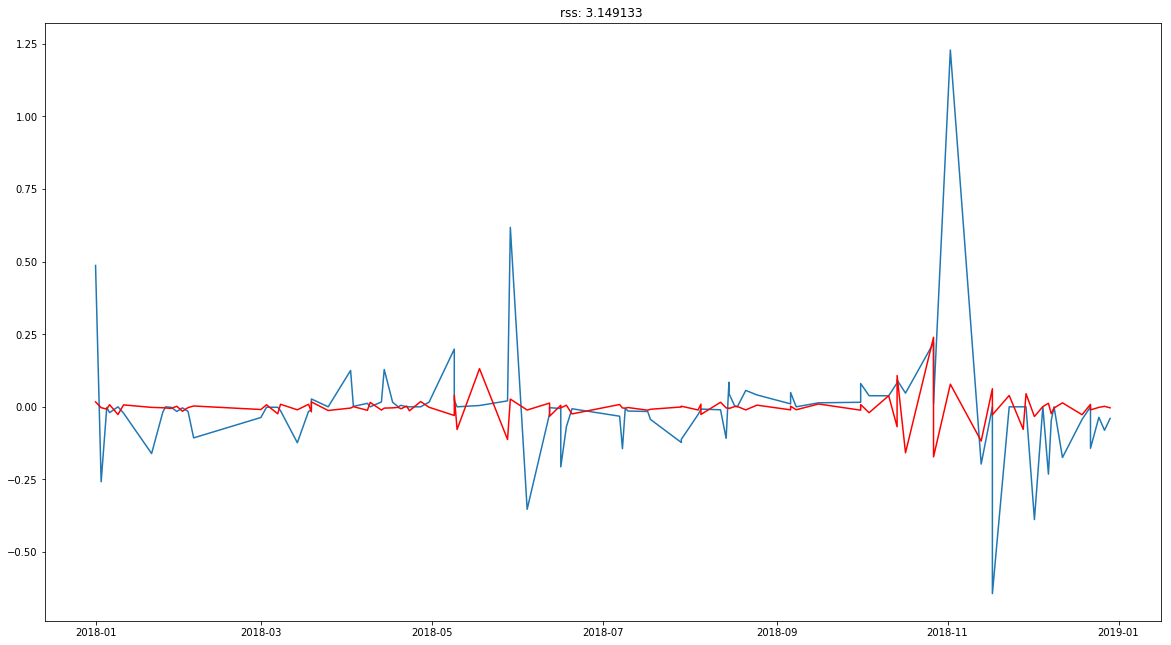

In [100]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
datasetlogshifting.dropna(inplace=True)
indexdataset_logscale.dropna(inplace=True)
model=ARIMA(indexdataset_logscale,order=(2,1,1))
results_AR=model.fit(disp=-1)
plt.plot(datasetlogshifting)
actual=datasetlogshifting.max()*indexdataset.max()
predicted=results_AR.fittedvalues.max()*indexdataset.max()
# print(actual)
# print(predicted)
print(actual-predicted)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('rss: %4f '% sum((results_AR.fittedvalues-datasetlogshifting['Traffic'])**2))
print('Plotting AR model')



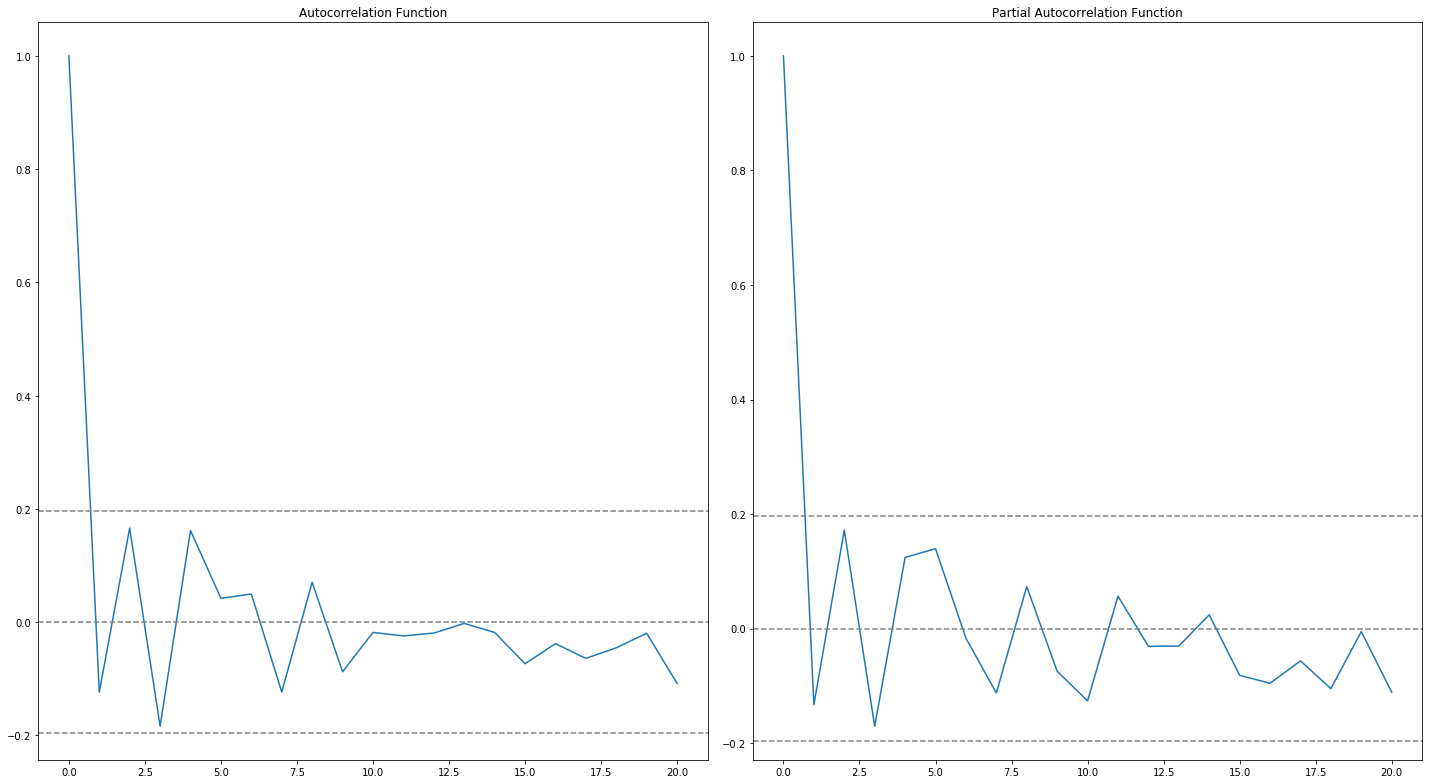

In [90]:
from statsmodels.tsa.stattools import acf, pacf
#ACF & PACF plots

lag_acf = acf(datasetlogshifting, nlags=20)
lag_pacf = pacf(datasetlogshifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogshifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogshifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogshifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogshifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

In [91]:
prediction_ARIMA_diff=pd.Series(results_AR.fittedvalues,copy=True)
print(prediction_ARIMA_diff.head())

Date
2018-12-29   -0.003425
2018-12-27    0.001654
2018-12-25   -0.001901
2018-12-22   -0.010577
2018-12-22    0.008407
dtype: float64


In [92]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Date
2018-12-29   -0.003425
2018-12-27   -0.001771
2018-12-25   -0.003672
2018-12-22   -0.014250
2018-12-22   -0.005843
dtype: float64


In [93]:
prediction_ARIMA_log = pd.Series(indexdataset_logscale['Traffic'].ix[0],index=indexdataset_logscale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head()

C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2018-01-01    6.316201
2018-01-03    6.299215
2018-01-05    6.302219
2018-01-06    6.310024
2018-01-09    6.302720
dtype: float64

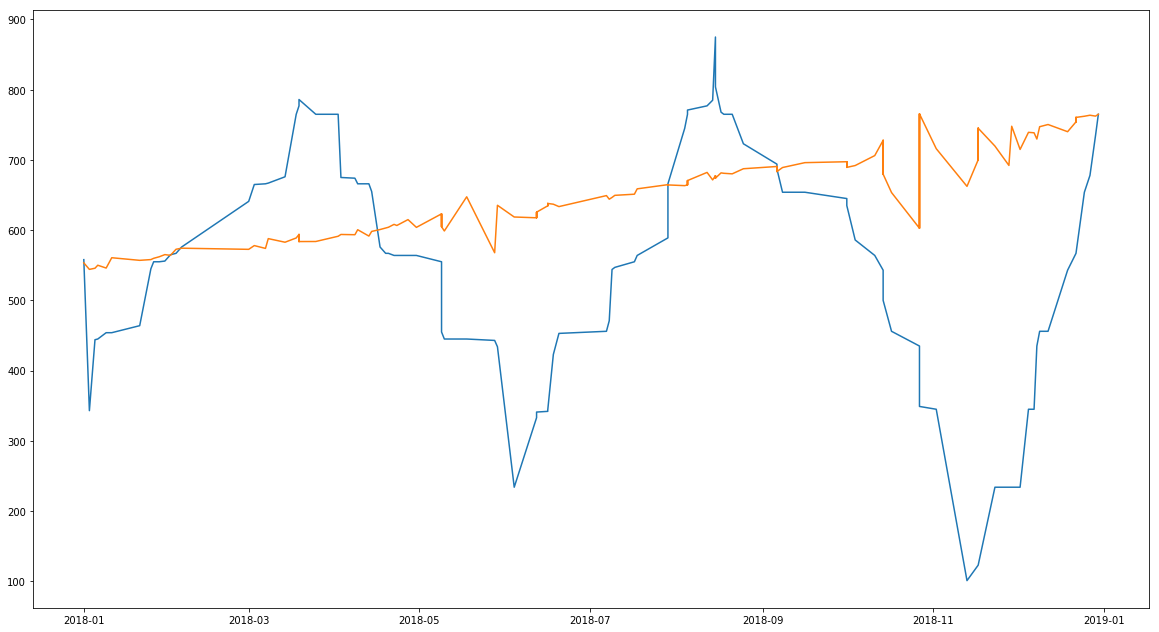

In [94]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexdataset)
plt.plot(prediction_ARIMA)

In [95]:
indexdataset_logscale

,Traffic
Date,
2018-12-30,6.639876
2018-12-29,6.599870
2018-12-27,6.519147
2018-12-25,6.483107
2018-12-22,6.340359
2018-12-22,6.340359
2018-12-19,6.297109
2018-12-12,6.122493
2018-12-09,6.122493


C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\MUDIT MANGAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


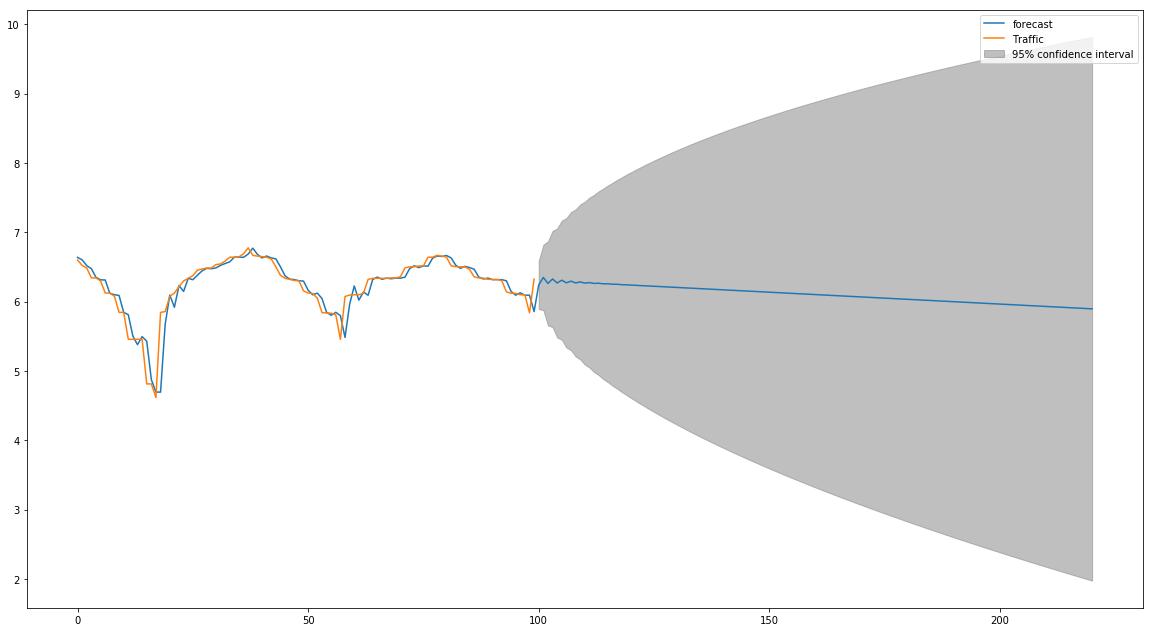

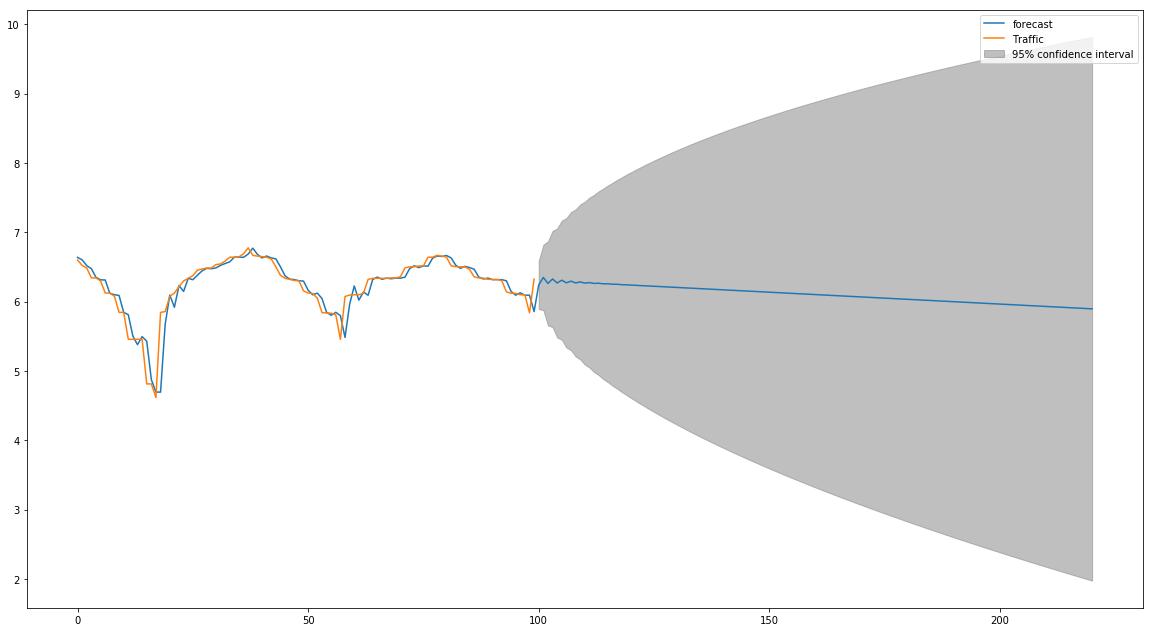

In [96]:
results_AR.plot_predict(1,221)
#results_AR.forecast(steps=120)